### Task1.4 - 模型调优

使用网格搜索法对7个模型进行调优（调参时采用五折交叉验证的方式），并进行模型评估，记得展示代码的运行结果~

[文档地址](https://shimo.im/docs/7ISamfEnhLYIXAOd)

In [1]:
#引入包
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import time

In [2]:
#读入数据
data = pd.read_csv('data_all.csv')

data.head()
data.describe()

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,reg_preference_for_trad,latest_query_time_month,latest_query_time_weekday,loans_latest_time_month,loans_latest_time_weekday
0,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,...,2.0,1200.0,1200.0,12.0,18.0,0,4.0,2.0,4.0,3.0
1,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,4.0,...,6.0,22800.0,9360.0,4.0,2.0,0,5.0,3.0,5.0,5.0
2,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,...,1.0,4200.0,4200.0,2.0,6.0,0,5.0,5.0,5.0,1.0
3,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,3.0,...,5.0,30000.0,12180.0,2.0,4.0,1,5.0,5.0,5.0,3.0
4,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,...,2.0,8400.0,8250.0,22.0,120.0,0,4.0,6.0,1.0,6.0


,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,reg_preference_for_trad,latest_query_time_month,latest_query_time_weekday,loans_latest_time_month,loans_latest_time_weekday
count,4754.000000,4754.000000,4754.000000,4754.000000,4754.000000,4754.000000,4754.000000,4754.000000,4754.000000,4754.000000,...,4754.000000,4754.000000,4754.000000,4754.000000,4754.000000,4754.000000,4754.000000,4754.00000,4754.000000,4754.000000
mean,0.021801,0.901332,1940.197728,14.152318,0.804493,0.365356,17.503155,29.004628,21.748422,2.678797,...,5.088347,16418.973496,7507.426378,24.041649,51.984013,0.372949,4.273875,3.42196,4.542701,3.025873
std,0.041519,0.144837,3923.971494,693.961441,0.196920,0.170194,4.474686,22.711659,16.472031,0.890198,...,3.344794,13885.107357,5830.674623,36.500344,53.249364,0.687382,1.333778,1.93213,2.987731,1.895870
min,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000,1.000000,0.00000,1.000000,0.000000
25%,0.010000,0.880000,0.000000,0.620000,0.670000,0.233000,15.000000,16.000000,12.000000,2.000000,...,3.000000,7800.000000,4200.000000,6.000000,7.000000,0.000000,4.000000,2.00000,3.000000,2.000000
50%,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,23.000000,17.000000,3.000000,...,4.000000,14400.000000,6750.000000,16.000000,29.000000,0.000000,4.000000,4.00000,4.000000,3.000000
75%,0.020000,0.990000,2000.000000,1.600000,1.000000,0.479500,20.000000,32.000000,26.750000,3.000000,...,7.000000,20400.000000,9696.250000,23.000000,86.000000,1.000000,5.000000,5.00000,5.000000,5.000000
max,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,234.000000,5.000000,...,20.000000,266400.000000,82800.000000,360.000000,323.000000,4.000000,12.000000,6.00000,12.000000,6.000000


In [3]:
# 拆分训练集和测试集
y = data['status']
X = data.drop(['status'],axis=1)
y.value_counts()
print('The shape of X is: ',X.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.3, random_state=2018)
y_train.value_counts()
y_test.value_counts()

0    3561
1    1193
Name: status, dtype: int64

('The shape of X is: ', (4754, 84))


0    2493
1     834
Name: status, dtype: int64

0    1068
1     359
Name: status, dtype: int64

In [4]:
#数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
#构建模型
lr_params = {"C":[0.1, 0.5, 1, 5, 10], "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag']}
svm_params = {"C":[0.1, 0.5, 1, 5, 10], "kernel":['rbf', 'linear', 'poly', 'sigmoid']}
dt_params = {"criterion":['gini', 'entropy'], "max_features":['auto', 'log2', None]}
rf_params = {"n_estimators":range(10,100,10), "criterion":['gini', 'entropy'], "max_depth":[2,3,4,5,None], "max_features":['auto', 'log2', None]}
gbdt_params = {"n_estimators":range(10,100,10), "learning_rate":[0.1, 0.5, 1, 5, 10], "max_depth":[2,3,4,5], "max_features":['auto', 'log2', None]}
xgb_params = {"n_estimators":range(10,100,10), "learning_rate":[0.1, 0.5, 1, 5, 10], "max_depth":[2,3,4,5]}  #xgb和gbdt默认max_depth=3
lgbm_params = {"n_estimators":range(10,100,10), "learning_rate":[0.1, 0.5, 1, 5, 10], "max_depth":[2,3,4,5,-1]}

lr_model = GridSearchCV(LogisticRegression(random_state=2018, class_weight='balanced',max_iter=1000), lr_params, cv = 5, scoring='roc_auc')
svm_model = GridSearchCV(SVC(random_state=2018, gamma='auto', probability=True, class_weight='balanced'), svm_params, cv = 5, scoring='roc_auc')
dt_model = GridSearchCV(DecisionTreeClassifier(random_state=2018, class_weight='balanced'), dt_params, cv = 5, scoring='roc_auc')
rf_model = GridSearchCV(RandomForestClassifier(random_state=2018, class_weight='balanced'), rf_params, cv = 5, scoring='roc_auc')
gbdt_model = GridSearchCV(GradientBoostingClassifier(random_state=2018), gbdt_params, cv = 5, scoring='roc_auc')
xgb_model = GridSearchCV(XGBClassifier(random_state=2018), xgb_params, cv = 5, scoring='roc_auc')
lgbm_model = GridSearchCV(LGBMClassifier(random_state=2018, class_weight='balanced'), lgbm_params, cv = 5, scoring='roc_auc')

models = {'LR':lr_model,
          'SVM':svm_model,
          'CART':dt_model,
         'RF':rf_model,
         'GBDT':gbdt_model,
         'XGB':xgb_model,
         'LightGBM':lgbm_model}

In [23]:
#模型评估--构建评价和画图函数
def evaluate(model, X, y):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)

    acc = metrics.accuracy_score(y, y_pred)
    p = metrics.precision_score(y, y_pred)
    r = metrics.recall_score(y, y_pred)
    f1 = metrics.f1_score(y, y_pred, average='weighted')
    fpr, tpr, thresholds = metrics.roc_curve(y, y_proba[:, 1])
    auc = metrics.auc(fpr, tpr)
    return acc, p, r, f1, fpr, tpr, auc

def plot_roc_curve(fpr, tpr, auc, label=None, title=None):
    plt.plot(fpr, tpr, label=label+'(' + title + ' AUC = %.2f)' %(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC of ' + title)
    plt.legend(loc="lower right")
    plt.savefig(title + '_ROC.jpg')

#这里的参数是各模型的ROC相关指标的数组
def plot_models_roc(fprs, tprs, aucs, title=None):
    plt.figure(figsize=(8,6))
    for i, name in enumerate(models):
        plt.plot(fprs[i], tprs[i], lw=lw,
                 label='{0} (AUC:{1:0.2f})'.format(name, aucs[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC of ' + title)
    plt.legend(loc="lower right")
    plt.savefig(title + '_ROC.jpg')
    plt.show()

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=2018,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.5, 1, 5, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

LR
{'C': 1, 'solver': 'newton-cg'}


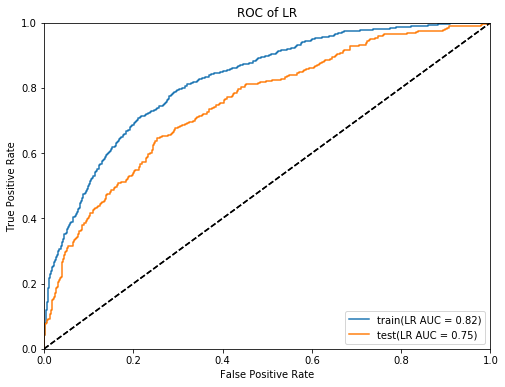

In [21]:
#测试
lr_model.fit(X_train, y_train)
print('LR')
print(lr_model.best_params_)
acc, p, r, f1, fpr_train, tpr_train, auc_train = evaluate(lr_model, X_train, y_train)
acc, p, r, f1, fpr_test, tpr_test, auc_test = evaluate(lr_model, X_test, y_test)
plt.figure(figsize=(8,6))
plot_roc_curve(fpr_train,tpr_train,auc_train,label='train',title='LR')
plot_roc_curve(fpr_test,tpr_test,auc_test,label='test',title='LR')
plt.show()

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=2018, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'C': [0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

SVM
{'kernel': 'linear', 'C': 0.5}


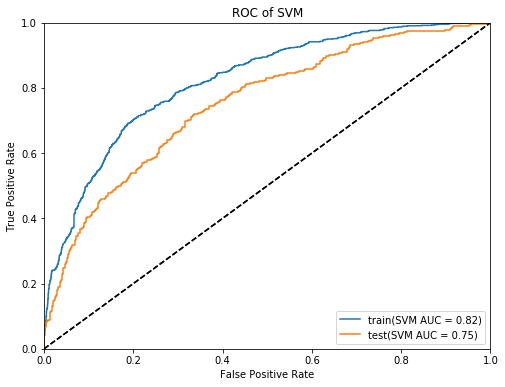

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=2018, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90], 'learning_rate': [0.1, 0.5, 1, 5, 10], 'max_depth': [2, 3, 4, 5, -1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

LightGBM
{'n_estimators': 40, 'learning_rate': 0.1, 'max_depth': 3}


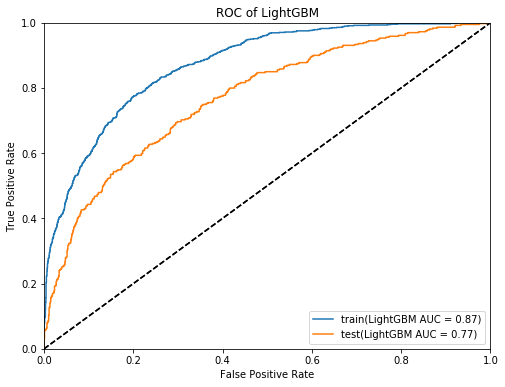

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=2018, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90], 'learning_rate': [0.1, 0.5, 1, 5, 10], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

XGB
{'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3}


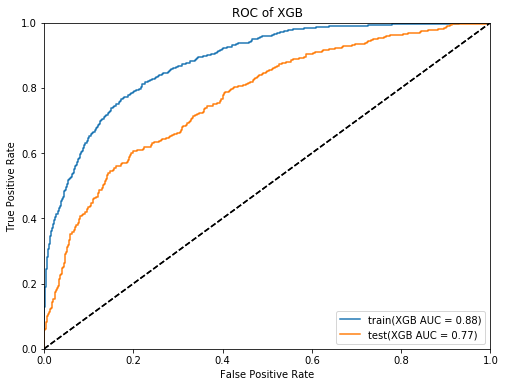

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2018,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': ['auto', 'log2', None], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

CART
{'max_features': None, 'criterion': 'entropy'}


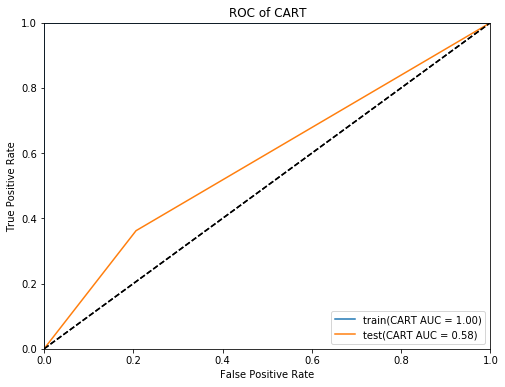

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=2018, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90], 'max_features': ['auto', 'log2', None], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

RF
{'max_features': 'auto', 'n_estimators': 90, 'criterion': 'gini', 'max_depth': 5}


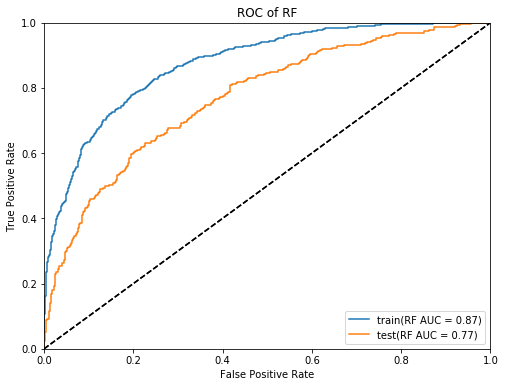

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90], 'max_features': ['auto', 'log2', None], 'learning_rate': [0.1, 0.5, 1, 5, 10], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

GBDT
{'max_features': 'auto', 'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3}


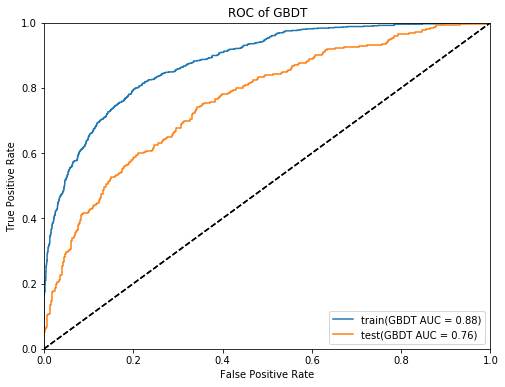

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=2018,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.5, 1, 5, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

LR
{'C': 1, 'solver': 'newton-cg'}


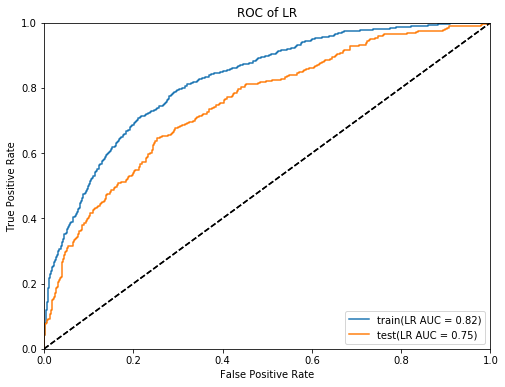

       Model  Group  Accuracy  Precision    Recall  F1 score       AUC
0        SVM  train  0.761948   0.518135  0.719424  0.773035  0.821391
1        SVM   test  0.698669   0.433645  0.646240  0.714801  0.751208
2   LightGBM  train  0.789300   0.556984  0.779376  0.799292  0.871588
3   LightGBM   test  0.723896   0.464066  0.629526  0.735983  0.769413
4        XGB  train  0.831981   0.832930  0.412470  0.810159  0.881231
5        XGB   test  0.789068   0.662921  0.328691  0.761759  0.768588
6       CART  train  1.000000   1.000000  1.000000  1.000000  1.000000
7       CART   test  0.685354   0.371429  0.362117  0.684017  0.578062
8         RF  train  0.813345   0.605760  0.731415  0.818761  0.874790
9         RF   test  0.750526   0.503580  0.587744  0.756540  0.769663
10      GBDT  train  0.835287   0.837264  0.425659  0.814704  0.880471
11      GBDT   test  0.782060   0.641176  0.303621  0.751986  0.763333
12        LR  train  0.764653   0.522467  0.711031  0.775081  0.823539
13    

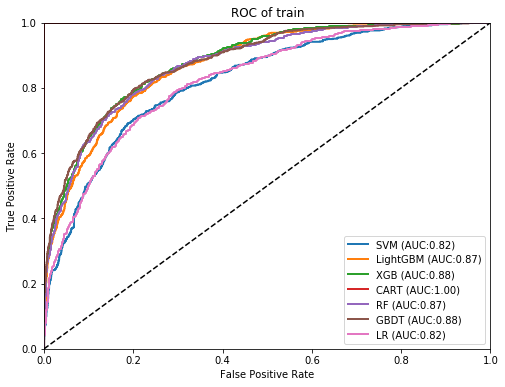

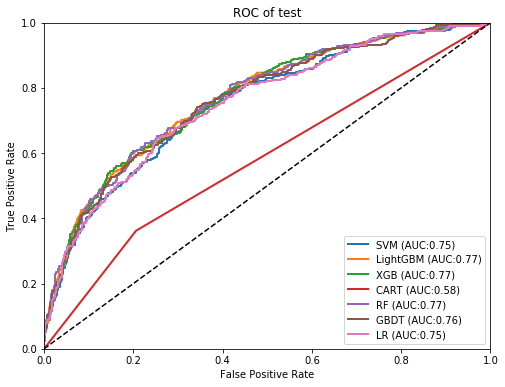

In [24]:
#输出模型结果
df_result = pd.DataFrame(columns=('Model', 'Group', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'AUC'))
row = 0
fprs_train = []
tprs_train = []
aucs_train = []
fprs_test = []
tprs_test = []
aucs_test = []
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name)
    print(model.best_params_)
    acc, p, r, f1, fpr_train, tpr_train, auc_train = evaluate(model, X_train, y_train)
    fprs_train.append(fpr_train)
    tprs_train.append(tpr_train)
    aucs_train.append(auc_train)
    df_result.loc[row] = [name, 'train', acc, p, r, f1, auc_train]
    row += 1

    acc, p, r, f1, fpr_test, tpr_test, auc_test = evaluate(model, X_test, y_test)
    fprs_test.append(fpr_test)
    tprs_test.append(tpr_test)
    aucs_test.append(auc_test)
    df_result.loc[row] = [name, 'test', acc, p, r, f1, auc_test]
    row += 1

    plt.figure(figsize=(8,6))
    plot_roc_curve(fpr_train,tpr_train,auc_train,label='train',title=name)
    plot_roc_curve(fpr_test,tpr_test,auc_test,label='test',title=name)
    plt.show()


print(df_result)
df_result.to_csv("df_result.csv")

plot_models_roc(fprs_train, tprs_train, aucs_train, title='train')
plot_models_roc(fprs_test, tprs_test, aucs_test, title='test')